<a href="https://colab.research.google.com/github/Dheerajthummala/Forecasting/blob/main/Forecasting(Airlinesdata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [56]:
data=pd.read_excel('Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [57]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [58]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

Data_driven_method


<Axes: >

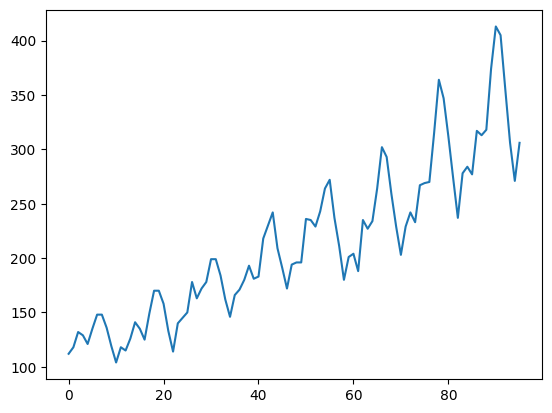

In [59]:
data.Passengers.plot()

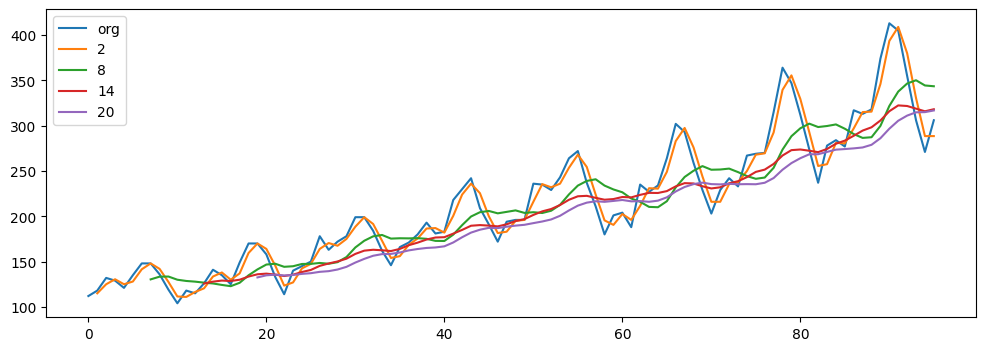

In [60]:
# average smoothing
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

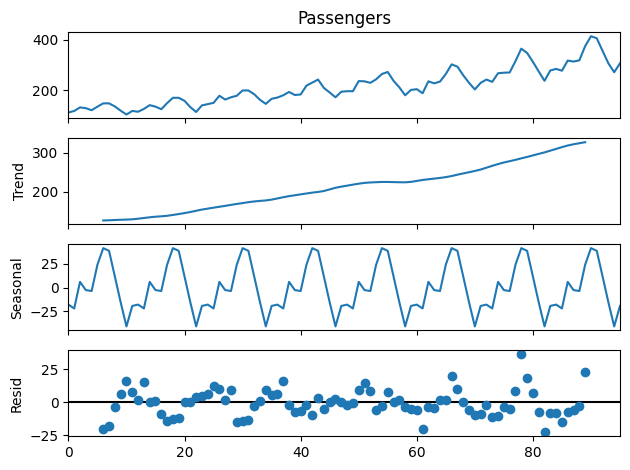

In [61]:
# time series decompostion plot
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

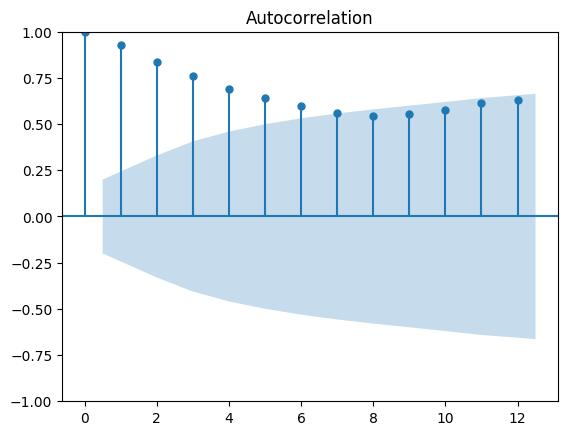

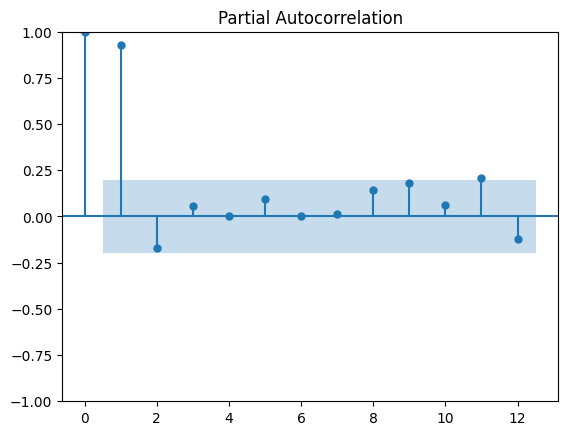

In [62]:
# Acf plots and Pacf plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()


In [63]:
# creating traing and testing data
Train=data.head(80)
Test=data.tail(15)

In [64]:
# Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [65]:
#simple exponential method
Train["Passengers"] = Train["Passengers"].astype('double')
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

<ipython-input-65-5921072061e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Passengers"] = Train["Passengers"].astype('double')
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


11.823005026626872

In [66]:
# Holt method
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

<ipython-input-66-a4bf67ac2529>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


54.234632051887715

In [67]:
#Holt Winter Exponential Smoothing Model with additive trend and additive seasonality
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

8.194348779519348

In [68]:
#Holt Winter Exponential Smoothing Model with additive trend and multiplicative seasonality
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

3.393091711543269

In [69]:
# as you can see multiplicative seasonality model is better its getting less error
hwe_model_mul_add = ExponentialSmoothing(data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [70]:
#Forecasting for next 10 time periods
f=hwe_model_mul_add.forecast(15)
f

96     312.899424
97     308.171306
98     355.532782
99     345.769814
100    345.696096
101    392.470733
102    436.501361
103    429.859243
104    380.172872
105    332.317301
106    290.625519
107    330.590176
108    337.370197
109    332.116256
110    382.980004
dtype: float64

In [71]:
# as per given predictions  it is predicting that approx 312 passengers travel in next month of january

<Axes: >

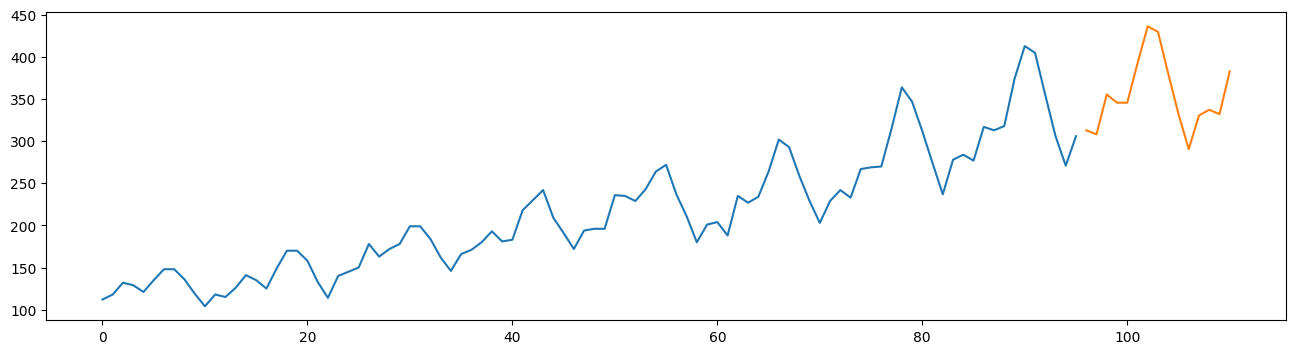

In [72]:
# Forecast Plot
data['Passengers'].plot(figsize=(16,4))
f.plot()

model_based_method


In [73]:
data.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [74]:
# Extracting Day, weekday name, month name, year from the Date column using
# Date functions from pandas
data["Date"]  = pd.to_datetime(data.Month, format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"]  = data.Date.dt.strftime("%Y") # year extraction
data["Day"] = data.Date.dt.strftime("%d") # Day extraction
data["weekday"] = data.Date.dt.strftime("%A") # weekday extraction
data.drop('Month',axis=1,inplace=True)
data.head(10)

,Passengers,Date,month,year,Day,weekday
0,112,1995-01-01,Jan,1995,01,Sunday
1,118,1995-02-01,Feb,1995,01,Wednesday
2,132,1995-03-01,Mar,1995,01,Wednesday
3,129,1995-04-01,Apr,1995,01,Saturday
4,121,1995-05-01,May,1995,01,Monday
5,135,1995-06-01,Jun,1995,01,Thursday
6,148,1995-07-01,Jul,1995,01,Saturday
7,148,1995-08-01,Aug,1995,01,Tuesday
8,136,1995-09-01,Sep,1995,01,Friday
9,119,1995-10-01,Oct,1995,01,Sunday


<Axes: xlabel='month', ylabel='year'>

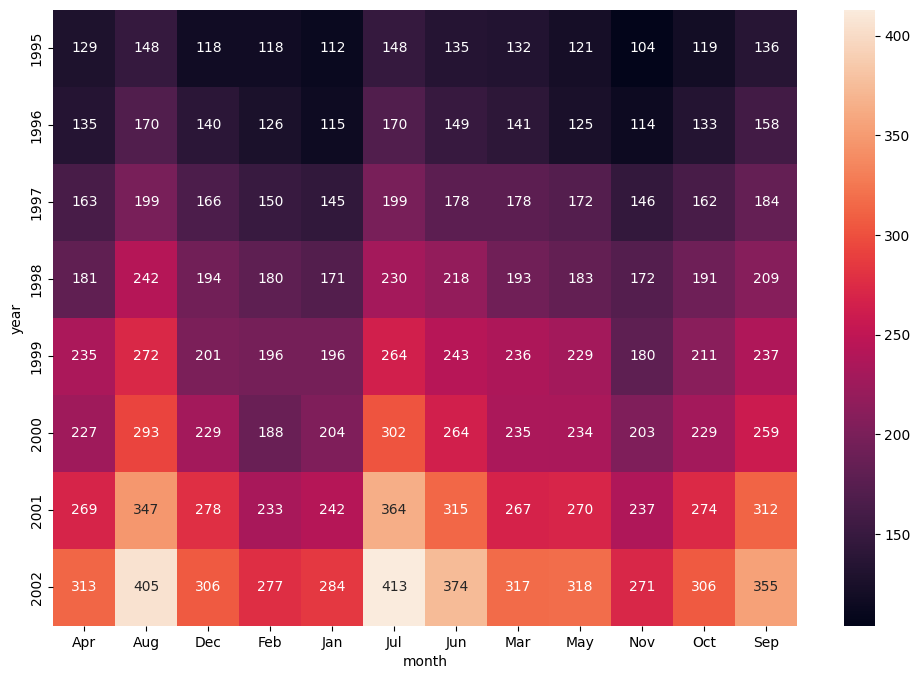

In [75]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


<Axes: xlabel='year', ylabel='Passengers'>

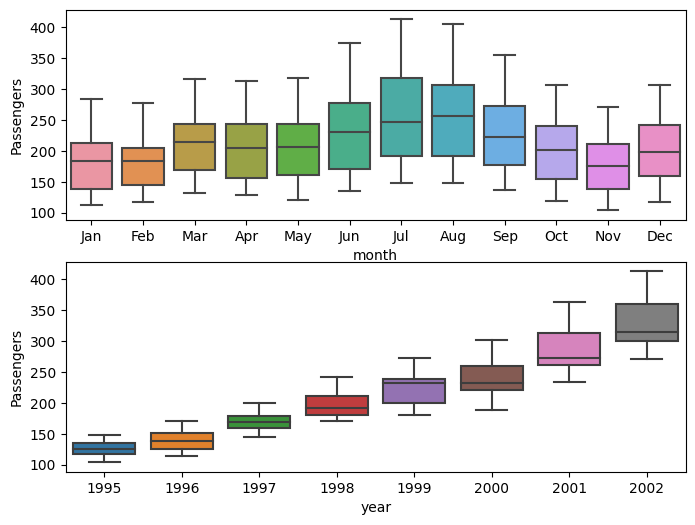

In [76]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)

In [77]:
# as you can see from the above plots
# accordings months most of the passengers traveling in the month of july and august
# and year by year the passengers are increasing

<Axes: xlabel='year', ylabel='Passengers'>

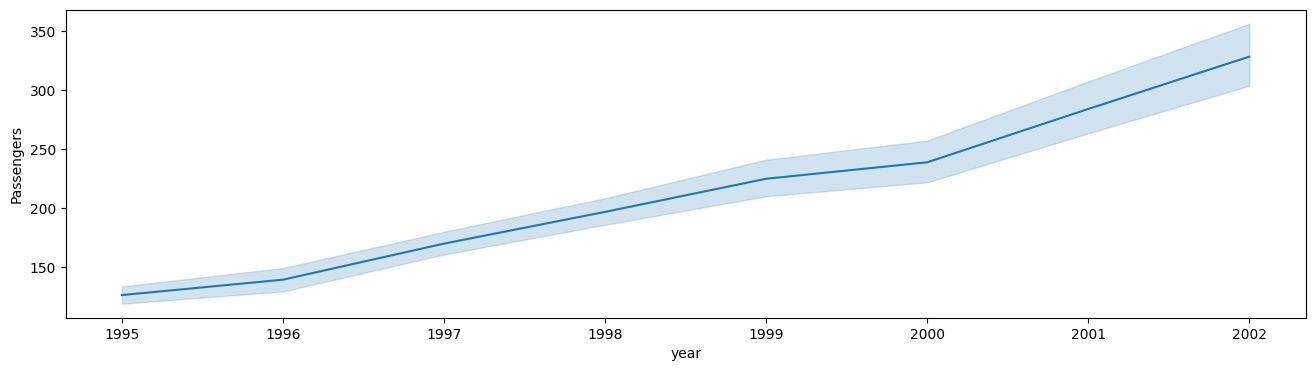

In [78]:
# Line plot of year vs passengers
plt.figure(figsize=(16,4))
sns.lineplot(x='year',y='Passengers',data=data)

In [81]:
# Converting categorical data into numerical data
month_dummies=pd.DataFrame(pd.get_dummies(data['month']))
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [83]:
# As you can see 12 dummie varuibles we created
# combining these to data
data1=pd.concat([data,month_dummies],axis=1)
data1

,Passengers,Date,month,year,Day,weekday,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,112,1995-01-01,Jan,1995,01,Sunday,0,0,0,0,1,0,0,0,0,0,0,0
1,118,1995-02-01,Feb,1995,01,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0
2,132,1995-03-01,Mar,1995,01,Wednesday,0,0,0,0,0,0,0,1,0,0,0,0
3,129,1995-04-01,Apr,1995,01,Saturday,1,0,0,0,0,0,0,0,0,0,0,0
4,121,1995-05-01,May,1995,01,Monday,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,2002-08-01,Aug,2002,01,Thursday,0,1,0,0,0,0,0,0,0,0,0,0
92,355,2002-09-01,Sep,2002,01,Sunday,0,0,0,0,0,0,0,0,0,0,0,1
93,306,2002-10-01,Oct,2002,01,Tuesday,0,0,0,0,0,0,0,0,0,0,1,0
94,271,2002-11-01,Nov,2002,01,Friday,0,0,0,0,0,0,0,0,0,1,0,0


In [85]:
# creating t, t_squared and log_passengers columns
data1['t']=np.arange(1,97)
data1['t_squared']=data1['t']*data1['t']
data1['log_passengers']=np.log(data1['Passengers'])
data1

,Passengers,Date,month,year,Day,weekday,Apr,Aug,Dec,Feb,...,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
0,112,1995-01-01,Jan,1995,01,Sunday,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,118,1995-02-01,Feb,1995,01,Wednesday,0,0,0,1,...,0,0,0,0,0,0,0,2,4,4.770685
2,132,1995-03-01,Mar,1995,01,Wednesday,0,0,0,0,...,0,0,1,0,0,0,0,3,9,4.882802
3,129,1995-04-01,Apr,1995,01,Saturday,1,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,121,1995-05-01,May,1995,01,Monday,0,0,0,0,...,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,2002-08-01,Aug,2002,01,Thursday,0,1,0,0,...,0,0,0,0,0,0,0,92,8464,6.003887
92,355,2002-09-01,Sep,2002,01,Sunday,0,0,0,0,...,0,0,0,0,0,0,1,93,8649,5.872118
93,306,2002-10-01,Oct,2002,01,Tuesday,0,0,0,0,...,0,0,0,0,0,1,0,94,8836,5.723585
94,271,2002-11-01,Nov,2002,01,Friday,0,0,0,0,...,0,0,0,0,1,0,0,95,9025,5.602119


In [86]:
Train = data1.head(80)
Test = data1.tail(15)

In [90]:
#Linear Model
import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

48.468732387881424

In [100]:
#Exponential
exp_model=smf.ols('log_passengers~t',data=Train).fit()
pred_exp=exp_model.predict(Test['t'])
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_Exp

44.991135961424376

In [101]:
#Quadratic

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

44.850544021885916

In [118]:
#Additive seasonality

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

130.1717983664168

In [119]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

24.332108697872403

In [120]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

136.31032365890482

In [123]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.704722827234109

In [124]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.704723
4,rmse_add_sea_quad,24.332109
2,rmse_Quad,44.850544
1,rmse_Exp,44.991136
0,rmse_linear,48.468732
3,rmse_add_sea,130.171798
5,rmse_Mult_sea,136.310324


In [126]:
# Build the model on entire data set using mul_add_sea_model

model_final=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+t',data=Train).fit()

In [127]:
pred_new=model_final.predict(Test)
pred_new=np.exp(pred_new)
pred_new

81    270.648521
82    237.771343
83    272.199133
84    278.808336
85    283.189950
86    327.170631
87    315.686737
88    312.633514
89    351.916335
90    391.762817
91    391.909918
92    351.324969
93    309.398688
94    271.814312
95    311.171310
dtype: float64